In [1]:
# Gerekli olan kütüpanelerin import edilmesi.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
# Veri setinin okunmasını sağlıyorum.
df = pd.read_csv(r"C:\Users\realb\Desktop\ML_dersler\ML_301\Gradient Boosting Machines Model\Hitters.csv")

# Veri setinin içinden eksik gözlemleri çıkarmak gerekiyor bu işlemi yapıyorum.
df = df.dropna()

# Şimdi ise dummies ile kukla veri işlemi yapıyorum. One end coding yöntemi ile bu işlemi yapıyorum.
dms = pd.get_dummies(df[['League', 'Division','NewLeague']])

# Bağımlı değişkenimi "y" atıyorum.
y = df["Salary"]

# Veri setimiz içindeki bağımlı değişkeni ve katogorik değişkenlerin götürülmesi işlemini yapıyorum.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Sonuçunda yukardaki değerlerin dummi versyonlarını ve bağımsız değişkenlerimi bir arada tutma işlemini yapıyorum.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Şimdi ise veri setimizde train ve test ayrımı yapmak için bu ayrımı yapma işlemini yapıyorum.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model ve tahmin

In [3]:
# Model kurulumu ve model nesnemi oluşturuyorum.
gbm_model =  GradientBoostingRegressor().fit(X_train, y_train)

In [6]:
gbm_model

GradientBoostingRegressor()

In [8]:
# Test hatasını hesaplamaya başlıyorum.


# Modole test hesaplamasını yaptırıyorum.
y_pred = gbm_model.predict(X_test)

# hata hesaplamasını yaptırıyorum.
np.sqrt(mean_squared_error(y_test, y_pred))

355.22747434508324

In [9]:
# Şimdi var olan paremetre setlerini elimizde tutup onlar üzerinden bu hiper paremetre tenımlaması yapmaya başlıyacağım.
help(gbm_model)

Help on GradientBoostingRegressor in module sklearn.ensemble._gb object:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  This estimator builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage a regression tree is fit on the negative gradient of the given
 |  loss function.
 |  
 |  :class:`sklearn.ensemble.HistGradientBoostingRegressor` is a much faster
 |  variant of this algorith

In [34]:
# burda bir sözlük yapısı tanımlayıp bu yapıya yönelik çalışma yapıçağım.

gbm_params = {"learning_rate": [0.001,0.01,0.1],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             'loss': ['huber'],
             }

In [35]:
# Şimdi üsteki model üzerinden model kurulumu ve buna ek modelin çalışmasını sağlıyorum.

gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [36]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [37]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'huber',
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.5}

In [38]:
# tunned edilmiş olan fonksyonu oluşturuyorum.

gbm_tunned = GradientBoostingRegressor(learning_rate = 0.1,
                                      loss = "huber",
                                      max_depth = 3,
                                      n_estimators = 200,
                                      subsample = 0.5).fit(X_train, y_train)

In [41]:
# Modele tahmin yaptırıyorum.
y_pred = gbm_tunned.predict(X_train)

In [ ]:
# Hata RMSE değerini hesaplıyorum.
np.sqrt(mean_squared_error(y_test, y_pred))

'\nBu işlem sonucunda kullanmış olduğumuz değerlerin hangisisin daha önemli olduğunu bize görece sıralamış oldu.\nBVu işelemi yapmaktaki amaçımız şu olmaktadır. 100 tane değişken var ve bunu herzaman kullanmak sitemeyeceğiz önemli olanlara bakıp devam edeçeğiz.\nBu şekilde bazen ise Hipre paremetre optimizisyonu yapabiliyoruz ama paremetre optimizasyonuda yapmalıyız.\n'

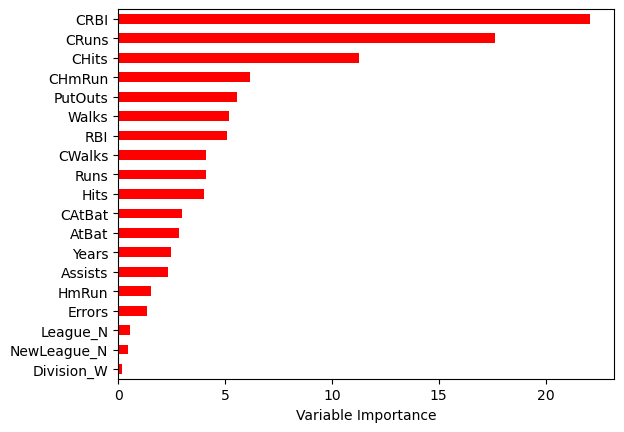

In [44]:
# Değişkenlerin önem düzeylerini hesaplama

# Model kularırken kullanmamız gerek değişkenleri görmemizi veya odaklanmamızı sağlayan bir imkan vermektedir.

# Şimdi burda bir data frame oluşturacağız ve bu modelin tunned edilmiş olan modelin değerleri Feature importances ismi verilen nesnesinden gelen değerler olacak.,
# Değişken oönemlerinin skor değerleri gelmektedir.
# İsimlerinide başka bir sütüne alıyorum.
Importance = pd.DataFrame({'Importance': gbm_tunned.feature_importances_*100},
                         index = X_train.columns)

# İmportance sütününa göre verileri sıralamak istiyorum, satır bazında olacak şekilde büyükten küçüğe doğru sıralamak istiyorum.
Importance.sort_values(by= 'Importance',
                       axis = 0,
                       ascending= True).plot(kind = 'barh',
                                            color = 'r')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None


"""
Bu işlem sonucunda kullanmış olduğumuz değerlerin hangisisin daha önemli olduğunu bize görece sıralamış oldu.
BVu işelemi yapmaktaki amaçımız şu olmaktadır. 100 tane değişken var ve bunu herzaman kullanmak sitemeyeceğiz önemli olanlara bakıp devam edeçeğiz.
Bu şekilde bazen ise Hipre paremetre optimizisyonu yapabiliyoruz ama paremetre optimizasyonuda yapmalıyız.
"""